In [2]:
import pandas as pd


In [32]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
import pickle

In [93]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from  sklearn.metrics import mean_squared_error

In [3]:
pd.__version__

'1.4.2'

In [10]:
gdf = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet')

gdf['duration'] =gdf.lpep_dropoff_datetime -gdf.lpep_pickup_datetime 
gdf['duration'] = gdf.duration.apply(lambda td:td.total_seconds()/60)

df = gdf[((gdf.duration >= 1) & (gdf.duration <= 60))]

categorical =['PULocationID','DOLocationID']
df[categorical] = df[categorical].astype(str)



/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

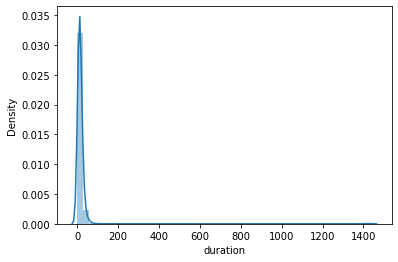

In [28]:
sns.distplot(gdf.duration)

In [22]:
gdf.duration.describe()

count    56551.000000
mean        18.171379
std         75.464751
min          0.000000
25%          7.250000
50%         11.400000
75%         17.316667
max       1438.983333
Name: duration, dtype: float64

In [23]:
gdf.duration.describe(percentiles = [0.95,0.98,0.99])

count    56551.000000
mean        18.171379
std         75.464751
min          0.000000
50%         11.400000
95%         33.683333
98%         46.816667
99%         59.825000
max       1438.983333
Name: duration, dtype: float64

In [24]:
((gdf.duration >= 1) & (gdf.duration <= 60)).mean()

0.9614860921999611

In [25]:
gdf.shape

(56551, 21)

In [26]:
df = gdf[((gdf.duration >= 1) & (gdf.duration <= 60))]

In [33]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333


In [34]:
categorical =['PULocationID','DOLocationID']
numerical =['trip_distance']

In [36]:
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_2261/1767203464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [37]:
df[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '236', 'DOLocationID': '239', 'trip_distance': 1.98},
 {'PULocationID': '65', 'DOLocationID': '170', 'trip_distance': 6.54},
 {'PULocationID': '74', 'DOLocationID': '262', 'trip_distance': 3.08},
 {'PULocationID': '74', 'DOLocationID': '116', 'trip_distance': 2.4},
 {'PULocationID': '74', 'DOLocationID': '243', 'trip_distance': 5.14},
 {'PULocationID': '33', 'DOLocationID': '209', 'trip_distance': 2.0},
 {'PULocationID': '74', 'DOLocationID': '238', 'trip_distance': 3.2},
 {'PULocationID': '166', 'DOLocationID': '239', 'trip_distance': 2.01},
 {'PULocationID': '226', 'DOLocationID': '226', 'trip_distance': 0.31},
 {'PULocationID': '7', 'DOLocationID': '129', 'trip_distance': 2.32}]

In [70]:
categorical =['PULocationID','DOLocationID']
numerical =['trip_distance']


dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)



In [42]:
target = 'duration'
y_train  = df_train[target].values
y_val = df_val[target].values



In [ ]:

lr = LinearRegression()
lr.fit(X_train, y_train)



mean_squared_error(y_train, y_pred, squared=False)
y_pred = lr.predict(X_train)

In [ ]:
dv = DictVectorizer()

train_dicts = df[categorical + numerical].to_dict(orient='records')


X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train  = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

In [43]:
X_train


<54373x449 sparse matrix of type '<class 'numpy.float64'>'
	with 163119 stored elements in Compressed Sparse Row format>

In [44]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=11',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',
 'DOLocationID=148',

In [47]:
y_train

array([11.5       , 20.86666667, 19.03333333, ...,  4.        ,
        6.        , 31.        ])

LinearRegression()

In [52]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


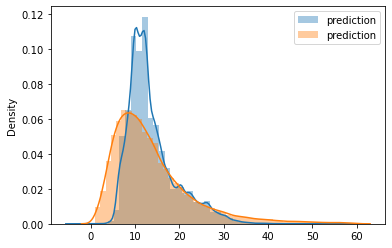

In [55]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'prediction')

plt.legend()

7.081905382194463

In [58]:
y_pred


array([10.9874032 , 25.34683669, 14.79681004, ..., 25.78754277,
        8.34010478, 23.2106736 ])

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

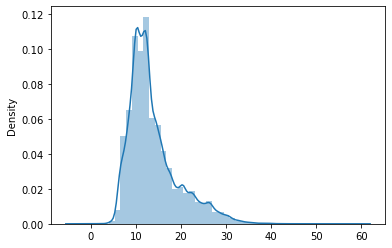

In [59]:
sns.distplot(y_pred, label = 'pred')

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [65]:
def read_dataframe(url):
    gdf = pd.read_parquet(url)

    gdf['duration'] =gdf.lpep_dropoff_datetime -gdf.lpep_pickup_datetime 
    gdf['duration'] = gdf.duration.apply(lambda td:td.total_seconds()/60)

    gdf = gdf[((gdf.duration >= 1) & (gdf.duration <= 60))]

    categorical =['PULocationID','DOLocationID']
    gdf[categorical] = gdf[categorical].astype(str)
    
    return gdf

In [66]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet')

In [89]:
df_train.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'duration'],
      dtype='object')

In [90]:
df_val.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'duration'],
      dtype='object')

In [69]:
len(df_train),len(df_val)

(54373, 51497)

In [84]:
df_train.shape

(54373, 21)

In [85]:
df_val.shape

(51497, 21)

In [86]:
X_train,X_val

(<54373x449 sparse matrix of type '<class 'numpy.float64'>'
 	with 163119 stored elements in Compressed Sparse Row format>,
 <51497x444 sparse matrix of type '<class 'numpy.float64'>'
 	with 154491 stored elements in Compressed Sparse Row format>)

In [79]:
categorical =['PULocationID','DOLocationID']
numerical =['trip_distance']


dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

In [80]:
target = 'duration'
y_train  = df_train[target].values
y_val = df_val[target].values



In [81]:

lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)


7.081905382194463

In [77]:
X_val

<51497x444 sparse matrix of type '<class 'numpy.float64'>'
	with 154491 stored elements in Compressed Sparse Row format>

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_val)

mean_squared_error(y_train, y_pred, squared=False)

In [91]:
# Define the categorical and numerical columns
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Create a DictVectorizer object
dv = DictVectorizer()

# Transform the training and validation data
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train  = df_train[target].values
y_val = df_val[target].values

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)

print("RMSE:", rmse)

RMSE: 7.273698652964146


In [98]:
# Define the categorical and numerical columns
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Create a DictVectorizer object
dv = DictVectorizer()

# Transform the training and validation data
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train  = df_train[target].values
y_val = df_val[target].values

# Train the Lasso model
model = Lasso(0.001)
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)

print("RMSE:", rmse)

RMSE: 7.262778193638785


In [95]:
# Define the categorical and numerical columns
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# Create a DictVectorizer object
dv = DictVectorizer()

# Transform the training and validation data
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train  = df_train[target].values
y_val = df_val[target].values

# Train the ridgeregrrssioon model
model = Ridge()
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)

print("RMSE:", rmse)

RMSE: 7.678832403347975


In [99]:
#changing he input features
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [100]:
df_val

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,2,2024-02-01 00:15:53,2024-02-01 00:24:20,N,1.0,75,161,1.0,2.77,13.50,...,3.75,0.0,NaN,1.0,22.50,1.0,1.0,2.75,8.450000,75_161
1,2,2024-01-31 22:59:22,2024-01-31 23:27:14,N,1.0,43,242,1.0,7.76,36.60,...,0.00,0.0,NaN,1.0,39.10,2.0,1.0,0.00,27.866667,43_242
2,2,2024-02-01 00:30:29,2024-02-01 00:35:32,N,1.0,75,238,1.0,1.03,7.90,...,2.60,0.0,NaN,1.0,13.00,1.0,1.0,0.00,5.050000,75_238
3,2,2024-01-31 23:56:42,2024-02-01 00:06:53,N,1.0,80,17,2.0,1.36,11.40,...,4.17,0.0,NaN,1.0,18.07,1.0,1.0,0.00,10.183333,80_17
5,2,2024-02-01 00:06:23,2024-02-01 00:10:10,N,1.0,97,25,1.0,0.34,5.10,...,0.00,0.0,NaN,1.0,7.60,2.0,1.0,0.00,3.783333,97_25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53572,2,2024-02-29 21:07:00,2024-02-29 21:34:00,None,NaN,223,137,NaN,5.43,32.16,...,7.18,0.0,NaN,1.0,43.09,NaN,NaN,NaN,27.000000,223_137
53573,2,2024-02-29 22:35:38,2024-02-29 22:46:25,None,NaN,256,37,NaN,1.50,2.70,...,2.74,0.0,NaN,1.0,6.44,NaN,NaN,NaN,10.783333,256_37
53574,2,2024-02-29 22:14:00,2024-02-29 22:39:00,None,NaN,75,33,NaN,10.07,47.14,...,15.27,0.0,NaN,1.0,66.16,NaN,NaN,NaN,25.000000,75_33
53575,2,2024-02-29 22:41:00,2024-02-29 22:53:00,None,NaN,97,33,NaN,1.54,12.22,...,3.30,0.0,NaN,1.0,16.52,NaN,NaN,NaN,12.000000,97_33


In [105]:
# Define the categorical and numerical columns
categorical = ['PU_DO']
numerical = ['trip_distance']

# Create a DictVectorizer object
dv = DictVectorizer()

# Transform the training and validation data
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

target = 'duration'
y_train  = df_train[target].values
y_val = df_val[target].values

# Make predictions on the validation data
y_pred = lr_model.predict(X_val)

# Calculate the RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)

print("RMSE:", rmse)

RMSE: 5.982652114977233


In [106]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv,lr_model),f_out)

In [107]:
# Define the categorical and numerical columns
categorical = ['PU_DO']
numerical = ['trip_distance']

# Create a DictVectorizer object
dv = DictVectorizer()

# Transform the training and validation data
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train  = df_train[target].values
y_val = df_val[target].values

# Train the Lasso model
lasso_model = Lasso(0.001)
lasso_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = lasso_model.predict(X_val)

# Calculate the RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)

print("RMSE:", rmse)

RMSE: 6.583747374286971


In [108]:
with open('models/lasso.bin', 'wb') as f_out:
    pickle.dump((dv,lasso_model),f_out)

In [103]:
# Define the categorical and numerical columns
categorical = ['PU_DO']
numerical = ['trip_distance']

# Create a DictVectorizer object
dv = DictVectorizer()

# Transform the training and validation data
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train  = df_train[target].values
y_val = df_val[target].values

# Train the ridgeregrrssioon model
model = Ridge()
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)

print("RMSE:", rmse)

RMSE: 8.036959496555712
